In [1]:
import pandas as pd
from neuralnet import *

# Load the configuration.
config = load_config("./config1.yaml")

# Load the data
x_input, y_input = load_data(path="./data/", mode="train")
x_test,  y_test  = load_data(path="./data/", mode="test")

# TODO: Create splits for validation data here.
# x_val, y_val = ...
ind  = int(x_input.shape[0]*0.99)
x_train, x_valid = x_input[:ind,:], x_input[ind:,:]
y_train, y_valid = y_input[:ind,:], y_input[ind:,:]

training_losses_nt_dict = {}
test_accuracy_nt_dict = {}

training_losses_lc_dict = {}
test_accuracy_lc_dict = {}

[3072, 64, 128, 10]
epoch0, val=0.268, train_acc=0.25107070707070706
epoch20, val=0.456, train_acc=0.5258181818181819
epoch40, val=0.478, train_acc=0.5471313131313131
epoch60, val=0.51, train_acc=0.5762424242424242
epoch80, val=0.522, train_acc=0.6014545454545455
Accuracy:  0.5324


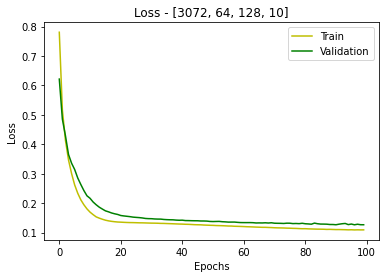

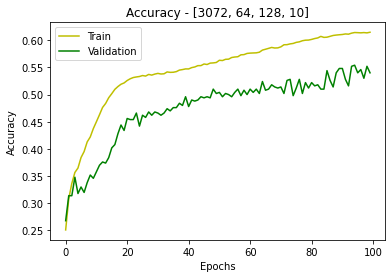

[3072, 128, 64, 10]
epoch0, val=0.314, train_acc=0.26026262626262625
epoch20, val=0.492, train_acc=0.5458181818181819
epoch40, val=0.528, train_acc=0.5747474747474748
epoch60, val=0.544, train_acc=0.6110707070707071
epoch80, val=0.544, train_acc=0.6457575757575758
Accuracy:  0.5357


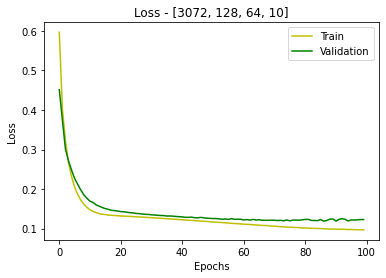

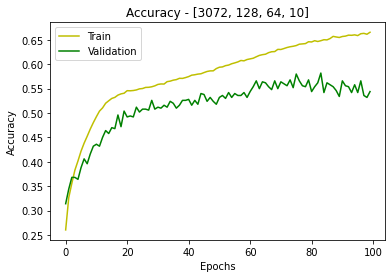

[3072, 32, 64, 10]
epoch0, val=0.232, train_acc=0.21591919191919193
epoch20, val=0.428, train_acc=0.4523030303030303
epoch40, val=0.464, train_acc=0.4861010101010101
epoch60, val=0.478, train_acc=0.514969696969697
epoch80, val=0.5, train_acc=0.5366464646464646
Accuracy:  0.5197


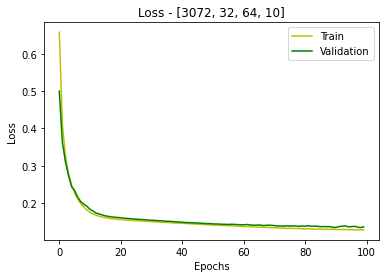

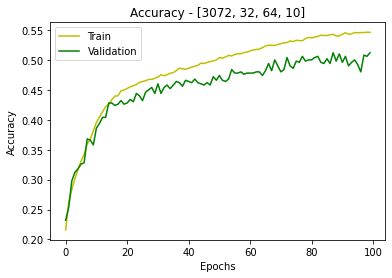

[3072, 64, 32, 10]
epoch0, val=0.294, train_acc=0.23024242424242425
epoch20, val=0.434, train_acc=0.47074747474747475
epoch40, val=0.476, train_acc=0.5066262626262626
epoch60, val=0.506, train_acc=0.5441616161616162
epoch80, val=0.506, train_acc=0.5742424242424242
Accuracy:  0.5308


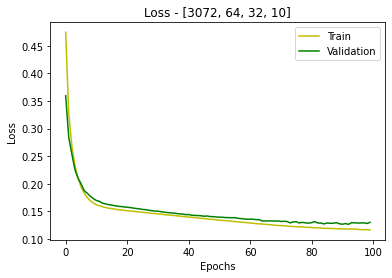

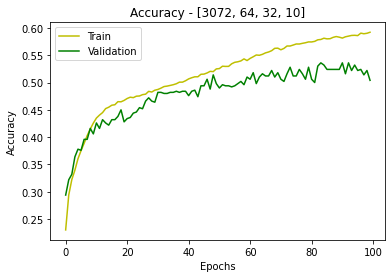

In [2]:
config_1 = config.copy()
COMBINATIONS = [(64,128),(128,64),(32, 64),(64, 32)]
Accuracies_list = {}
for combination in COMBINATIONS:
    config_1['layer_specs'][1:3] = combination
    print(config_1['layer_specs'])

    model  = Neuralnetwork(config_1)

    train_losses, val_losses, train_accs, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
    test_acc = test(model, x_test, y_test)

    # Store Values
    training_losses_nt_dict[combination] = train_losses
    test_accuracy_nt_dict[combination] = test_acc
    print("Accuracy: ", test_acc)

    # Plot
    plot(train_losses, val_losses, 'Loss - '+str(config_1['layer_specs']), ylabel='Loss')
    plot(train_accs, val_accs, 'Accuracy - '+str(config_1['layer_specs']), ylabel='Accuracy')
    del model

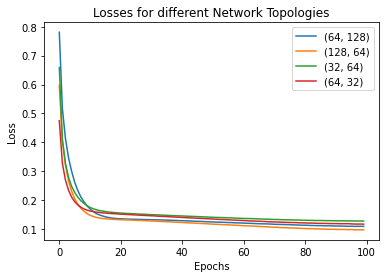

In [3]:
for i, comb in enumerate(COMBINATIONS):
    plt.plot(training_losses_nt_dict[comb], label=str(comb))
plt.title('Losses for different Network Topologies')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Fig_NT' + str(1) + '.png')
plt.show()

In [4]:
test_performance = pd.DataFrame.from_dict(test_accuracy_nt_dict, orient = 'index')
test_performance.reset_index(inplace = True)
test_performance.columns = ['Hidden Layer Units','Test accuracy']
test_performance
print(test_performance.to_latex())

\begin{tabular}{llr}
\toprule
{} & Hidden Layer Units &  Test accuracy \\
\midrule
0 &          (64, 128) &         0.5324 \\
1 &          (128, 64) &         0.5357 \\
2 &           (32, 64) &         0.5197 \\
3 &           (64, 32) &         0.5308 \\
\bottomrule
\end{tabular}



[3072, 64, 10]
epoch0, val=0.266, train_acc=0.2078989898989899
epoch20, val=0.438, train_acc=0.47064646464646465
epoch40, val=0.492, train_acc=0.507030303030303
epoch60, val=0.512, train_acc=0.5262424242424243
epoch80, val=0.518, train_acc=0.5335959595959596
Accuracy:  0.5108


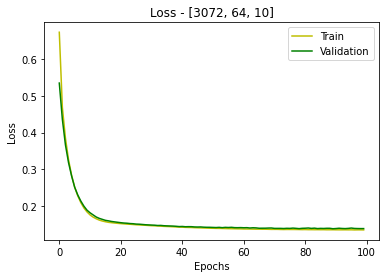

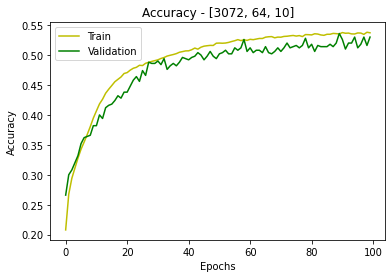

In [5]:
config_1['layer_specs'] = [3072, 64, 10]

print(config_1['layer_specs'])

model  = Neuralnetwork(config_1)

train_losses, val_losses, train_accs, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)
training_losses_lc_dict[1] = train_losses
test_accuracy_lc_dict[1] = test_acc



print("Accuracy: ", test_acc)
plot(train_losses, val_losses, 'Loss - '+str(config_1['layer_specs']), ylabel='Loss')
plot(train_accs, val_accs, 'Accuracy - '+str(config_1['layer_specs']), ylabel='Accuracy')
del model

[3072, 64, 64, 10]
epoch0, val=0.282, train_acc=0.24204040404040403
epoch20, val=0.438, train_acc=0.4877575757575758
epoch40, val=0.468, train_acc=0.5224040404040404
epoch60, val=0.494, train_acc=0.5553939393939394
epoch80, val=0.508, train_acc=0.5795555555555556
Accuracy:  0.5213


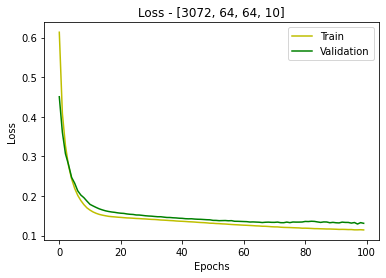

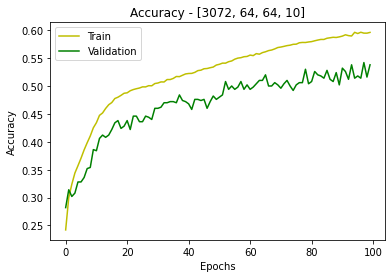

In [6]:
config_1['layer_specs'] = [3072, 64,64, 10]

print(config_1['layer_specs'])

model  = Neuralnetwork(config_1)

train_losses, val_losses, train_accs, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)
training_losses_lc_dict[2] = train_losses
test_accuracy_lc_dict[2] = test_acc

print("Accuracy: ", test_acc)
plot(train_losses, val_losses, 'Loss - '+str(config_1['layer_specs']), ylabel='Loss')
plot(train_accs, val_accs, 'Accuracy - '+str(config_1['layer_specs']), ylabel='Accuracy')
del model

[3072, 64, 32, 32, 10]
epoch0, val=0.23, train_acc=0.22834343434343435
epoch20, val=0.438, train_acc=0.47519191919191917
epoch40, val=0.482, train_acc=0.5004242424242424
epoch60, val=0.478, train_acc=0.5131515151515151
epoch80, val=0.49, train_acc=0.5256969696969697
Accuracy:  0.5014


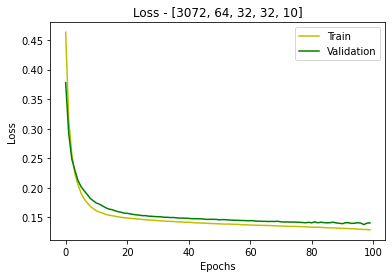

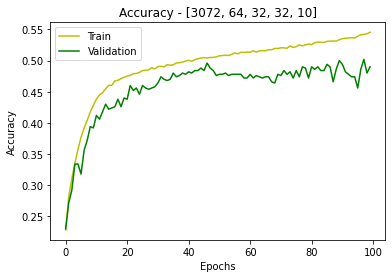

In [7]:
config_1['layer_specs'] = [3072, 64, 32, 32, 10]

print(config_1['layer_specs'])

model  = Neuralnetwork(config_1)

train_losses, val_losses, train_accs, val_accs = train(model, x_train, y_train, x_valid, y_valid, config)
test_acc = test(model, x_test, y_test)
training_losses_lc_dict[3] = train_losses
test_accuracy_lc_dict[3] = test_acc


print("Accuracy: ", test_acc)
plot(train_losses, val_losses, 'Loss - '+str(config_1['layer_specs']), ylabel='Loss')
plot(train_accs, val_accs, 'Accuracy - '+str(config_1['layer_specs']), ylabel='Accuracy')
del model

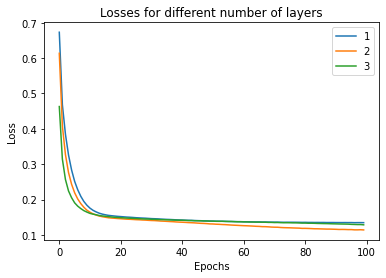

In [8]:
for comb in training_losses_lc_dict:
    plt.plot(training_losses_lc_dict[comb], label=str(comb))
plt.title('Losses for different number of layers')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Fig_LC' + str(1) + '.png')
plt.show()

In [10]:
import pandas as pd
test_performance = pd.DataFrame.from_dict(test_accuracy_lc_dict, orient = 'index')
test_performance.reset_index(inplace = True)
test_performance.columns = ['Activation','Test accuracy']
test_performance
print(test_performance.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Activation &  Test accuracy \\
\midrule
0 &           1 &         0.5108 \\
1 &           2 &         0.5213 \\
2 &           3 &         0.5014 \\
\bottomrule
\end{tabular}

